In [24]:
import pandas as pd
names1880 = pd.read_csv('names/yob1880.txt',names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [25]:
years = range(1880,2010)

pieces = []
columns = ['names','sex','births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [34]:
names

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1658169,Zyquarius,M,5,2009,0.000003
1658170,Zyran,M,5,2009,0.000003
1658171,Zyreion,M,5,2009,0.000003
1658172,Zyrian,M,5,2009,0.000003


In [35]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2005,1846825,1996273
2006,1900092,2054077
2007,1921385,2074138
2008,1889483,2038689
2009,1835518,1981950


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

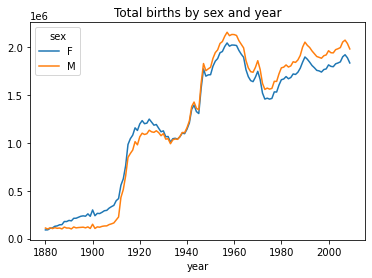

In [36]:
total_births.plot(title="Total births by sex and year")

In [46]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1658169,Zyquarius,M,5,2009,0.000003
1658170,Zyran,M,5,2009,0.000003
1658171,Zyreion,M,5,2009,0.000003
1658172,Zyrian,M,5,2009,0.000003


In [47]:
# sum of all groups in the 'prop' should be equal to one. check this using the funcion np.allclose()
import numpy as np
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [48]:
#def get_top1000(group):
#    return group.sort_values(by='births',ascending=False)[:1000]
#grouped = names.groupby(['year','sex'])
#top1000 = grouped.apply(get_top1000)

In [49]:
#top1000

In [53]:
# method 2, DIY approach instead of function
pieces=[]
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top1000 = pd.concat(pieces,ignore_index=True)

In [54]:
top1000

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
259872,Stone,M,198,2009,0.000100
259873,Fredrick,M,197,2009,0.000099
259874,Immanuel,M,197,2009,0.000099
259875,Nick,M,197,2009,0.000099


In [56]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

boys


,names,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393
...,...,...,...,...,...
259872,Stone,M,198,2009,0.000100
259873,Fredrick,M,197,2009,0.000099
259874,Immanuel,M,197,2009,0.000099
259875,Nick,M,197,2009,0.000099


In [57]:
girls

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
258872,Samiyah,F,266,2009,0.000145
258873,Karli,F,266,2009,0.000145
258874,Amiah,F,265,2009,0.000144
258875,Bree,F,265,2009,0.000144


In [61]:
total_births = top1000.pivot_table('births', index = 'year',columns = 'names', aggfunc = sum)
total_births

names,Aaden,Aaliyah,Aarav,Aaron,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,...,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,71.0,NaN,...,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,81.0,NaN,...,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,80.0,NaN,...,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,79.0,NaN,...,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,98.0,NaN,...,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,NaN,3458.0,NaN,7804.0,NaN,288.0,NaN,453.0,445.0,601.0,...,NaN,NaN,4963.0,2274.0,502.0,NaN,NaN,NaN,NaN,NaN
2006,NaN,3744.0,NaN,8299.0,NaN,298.0,NaN,404.0,440.0,630.0,...,NaN,NaN,5153.0,2852.0,531.0,NaN,NaN,NaN,NaN,NaN
2007,NaN,3958.0,NaN,8941.0,NaN,313.0,NaN,349.0,468.0,652.0,...,NaN,NaN,4936.0,3039.0,527.0,NaN,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

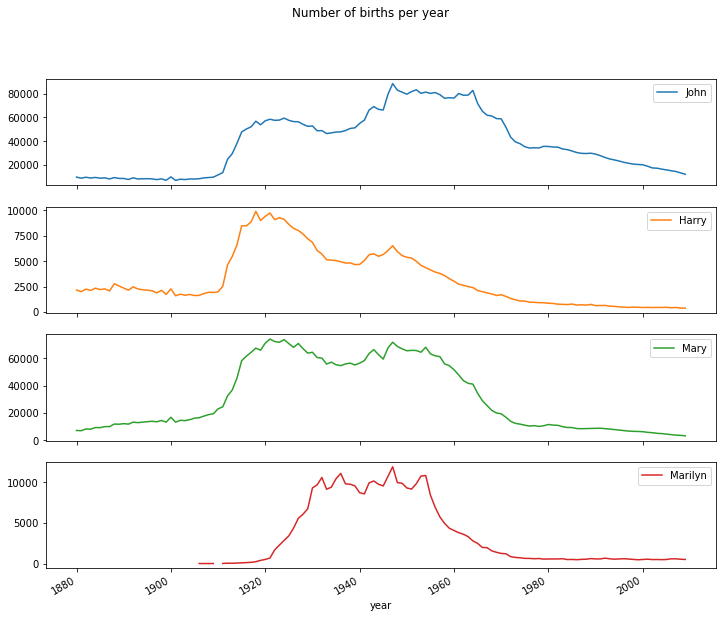

In [60]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10),grid = False,title='Number of births per year')


<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

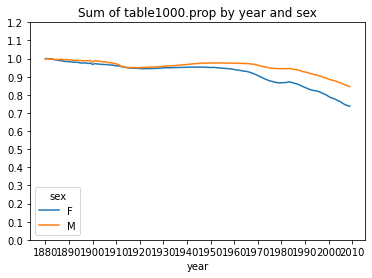

In [65]:
# the above can be explained by measuring the increase in naming diversity
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [66]:
# number of distince names taken in popularity from hightest to lowest in the top 50%
df = boys[boys.year == 2009]
df

,names,sex,births,year,prop
258877,Jacob,M,21181,2009,0.010687
258878,Ethan,M,19848,2009,0.010014
258879,Michael,M,18948,2009,0.009560
258880,Alexander,M,18237,2009,0.009202
258881,William,M,17924,2009,0.009044
...,...,...,...,...,...
259872,Stone,M,198,2009,0.000100
259873,Fredrick,M,197,2009,0.000099
259874,Immanuel,M,197,2009,0.000099
259875,Nick,M,197,2009,0.000099


In [70]:
# sort in desceding order, then we want to know how many of the most popular names it takes to reach 50%
# therefore we take cumulative sum. then use 'searchsorted' to return the position in the cumulative sum at which 0.5 would need
# to be inserted to keep it i sorted order
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

258877    0.010687
258878    0.020701
258879    0.030262
258880    0.039463
258881    0.048507
258882    0.057415
258883    0.066269
258884    0.074995
258885    0.083700
258886    0.091953
Name: prop, dtype: float64

In [72]:
prop_cumsum.searchsorted(0.5) + 1 #since array is 0 index we add 1

114

In [73]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [75]:
# this shows that diverstiy has increased, as it takes more names to make the top 50% when cpmpared to the 1900s
# this can be performed for every year
def get_quantile_count(group,q=0.5):
    group=group.sort_values(by='prop',ascending = False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(['year','sex',]).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [76]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

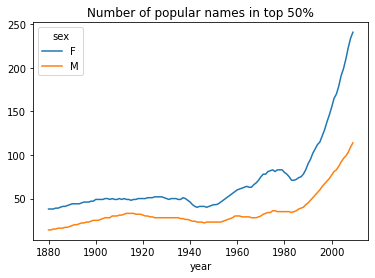

In [77]:
 diversity.plot(title='Number of popular names in top 50%')

In [88]:
# analysing the trend in the last letter of each name 
get_last_letter = lambda x : x[-1]
last_letter = names.names.map(get_last_letter)
last_letter.name = "last_letter"

table = names.pivot_table('births',index = last_letter,columns=['sex','year'],aggfunc=sum)

In [89]:
subtable = table.reindex(columns = [1910,1960,2009],level = 'year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2009     1910      1960      2009
last_letter                                                           
a            108399.0  691274.0  701612.0    977.0    5214.0   31634.0
b                 NaN     694.0     435.0    411.0    3912.0   39102.0
c                 5.0      49.0     934.0    482.0   15457.0   24162.0
d              6751.0    3731.0    2877.0  22113.0  262117.0   46372.0
e            133601.0  435027.0  324051.0  28665.0  178764.0  136064.0

In [90]:
#normalize the table by total births to compute a new table containing proportion of total births for each sex ending in each letter
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022015.0
     2009    1835518.0
M    1910     194210.0
     1960    2132133.0
     2009    1981950.0
dtype: float64

In [91]:
letter_prop = subtable / subtable.sum().astype(float)

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

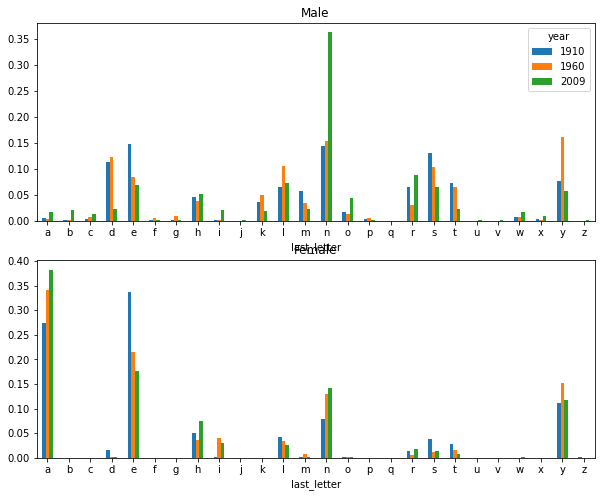

In [95]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop["M"].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop["F"].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [96]:
# using the full table, normalize by year and sex and select a subset of letter for the boy names
# then transpose them to make each column a time series
letter_prop = table/table.sum().astype(float)
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<AxesSubplot:xlabel='year'>

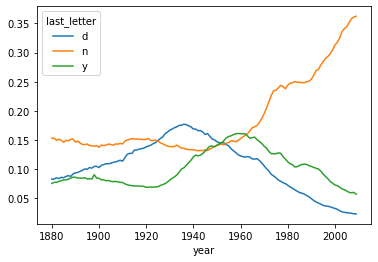

In [97]:
dny_ts.plot()

In [99]:
# analysing the names that changed sexes. eg) lesley to leslie
all_names = top1000.names.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [101]:
filtered = top1000[top1000.names.isin(lesley_like)]
filtered.groupby('names').births.sum()

names
Leslee       993
Lesley     35036
Lesli        929
Leslie    369009
Lesly       9567
Name: births, dtype: int64

In [102]:
#aggregate by sex and year and normalize within year
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)
table = table.div(table.sum(1),axis = 0)
table.tail()

sex,F,M
year,,
2005,1.0,NaN
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN


<AxesSubplot:xlabel='year'>

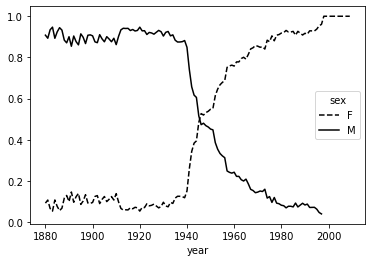

In [103]:
#plot of sex over time 
table.plot(style={'M' : 'k-', 'F' : 'k--'})